# BELLHOP

## Import

In [1]:
import arlpy.uwapm as pm
import numpy as np

## Results grid

In [2]:
x = np.linspace(-7500, 15000, 1080)
z = np.linspace(-15, 3100,  720)

## Source specs

In [3]:
tx_freq  = 5000
tx_depth = 250
tx_angle = np.linspace(-180, 180 , 360)
tx_level = 10*np.sin(2*np.pi*16*tx_angle/360)+10*np.sin(2*np.pi*8*tx_angle/360)

## Top surface

In [4]:
surfaceWaveHeight = 3 # m
surfaceWaveLength = 7 # m
top_range         = np.array([-13000, 1000, 5000, 10000])
top_interface     = surfaceWaveHeight*np.sin(2*np.pi/surfaceWaveLength*top_range)

## Sound speed profiles

In [5]:
ssp_range = np.array([-5000, 0, 5000])
ssp_depth = np.array([100, 500, 1000, 2500])
ssp       = np.array([[1200,  1600, 1600],
                      [1200,  1600, 1600],
                      [1600,  1200, 1200], 
                      [1600,  1600, 1600]])

## Bottom surface

In [6]:
bot_range     = np.array([-10000, -500, 5000, 7000, 10000])
bot_interface = np.array([2000, 1000, 3000, 2000, 1500])

## Make env

In [7]:
env = pm.make_env2d(
                
        pad_inputData   = True, 
        name            = 'Example',

        # BELLHOP mode and attn
        mode            = 'coherent', 
        volume_attn     = 'Thorp',
        
        # ALL: Receiver positoins
        rx_range        = x,                                                   # m
        rx_depth        = z,                                                   # m
        
        # OALIB: Top boundary condition
        top_boundary    = 'vacuum',
        
        # BELLHOP: Top interface
        top_interface   = np.column_stack((top_range,top_interface)),          # m
        
        # ALL: Sound speed profiles
        ssp_range       = ssp_range,                                           # m
        ssp_depth       = ssp_depth,                                           # m
        ssp             = ssp,                                                 # m/s

        # OALIB: Sound speed interpolation
        ssp_interp      = 'quadrilatteral',
        
        # ALL: Source freq and depth
        tx_freq         = tx_freq,                                             # Hz
        tx_depth        = tx_depth,                                            # m
        
        # BELLHOP: Source directivity
        tx_beam         = np.column_stack((tx_angle,tx_level)),                # degree, dB
        tx_nbeams       = 0,                                                   # 0 = automatic
        tx_minAngle     = -180,                                                # deg                         
        tx_maxAngle     = 180,                                                 # deg

        # ALL: Bottom interface
        bot_interface   = np.column_stack((bot_range,bot_interface)),          # m
                                                        
        # OALIB: Bottom boundary 
        bot_boundary    = 'acousto-elastic',
        attn_unit       = 'dB/wavelength',
        bot_roughness   = 0.2,                                                 # m (rms)
        bot_density     = 2.75,                                                # g/cm3
        bot_PwaveSpeed  = 6000,                                                # m/s 
        bot_SwaveSpeed  = 3500,                                                # m/s 
        bot_PwaveAttn   = 0.02,                                                # dB/wavelength 
        bot_SwaveAttn   = 0.02,                                                # dB/wavelength 
        )

## BELLHOP class initialization

In [8]:
BELLHOP = pm.BELLHOP(env)

## Compute transmission loss

In [9]:
tl = BELLHOP.compute_transmission_loss()

## Plot

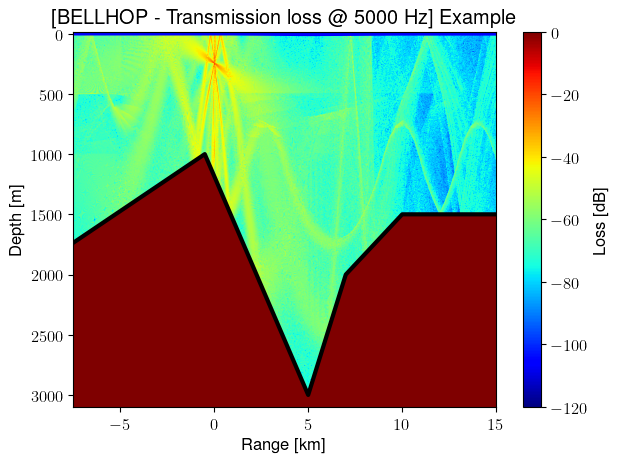

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[BELLHOP - Transmission loss @ 5000 Hz] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [10]:
BELLHOP.plot_transmission_loss()

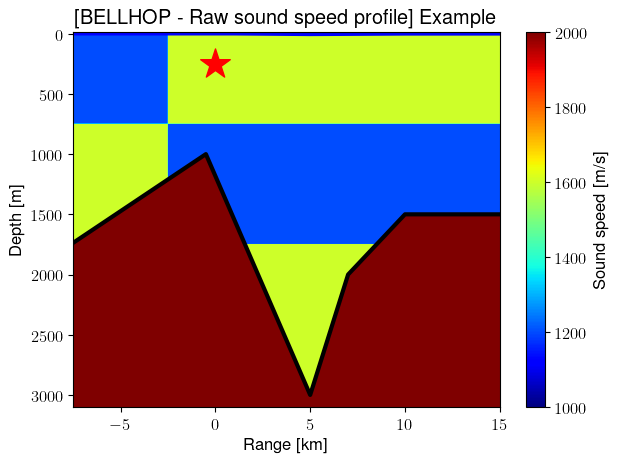

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[BELLHOP - Raw sound speed profile] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [11]:
BELLHOP.plot_raw_ssp(vmin=1000, vmax=2000)

## Set env for a single rx position

In [12]:
env['rx_range'] = 10000
env['rx_depth'] = 20
env = pm.make_env2d(**env)    
env = BELLHOP.set_env(env)

## Compute arrivals

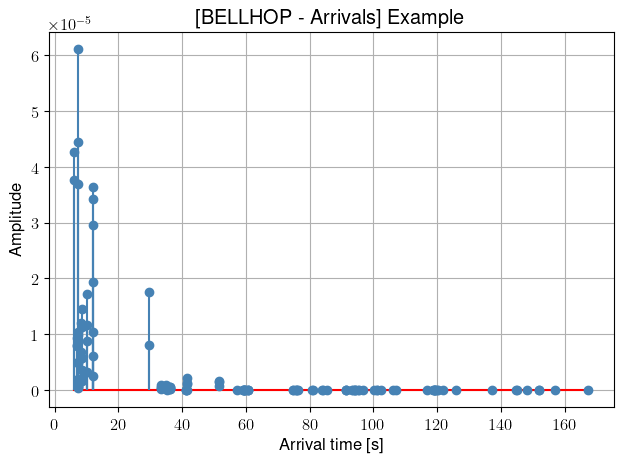

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[BELLHOP - Arrivals] Example'}, xlabel='Arrival time [s]', ylabel='Amplitude'>)

In [13]:
BELLHOP.compute_arrivals()
BELLHOP.plot_arrivals()  

## Compute impulse response

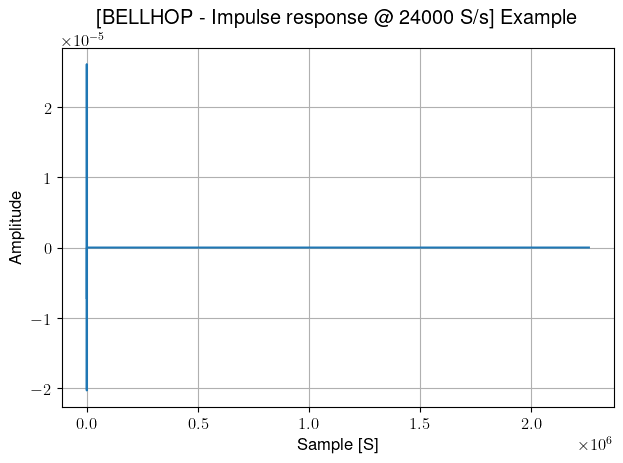

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[BELLHOP - Impulse response @ 24000 S/s] Example'}, xlabel='Sample [S]', ylabel='Amplitude'>)

In [14]:
BELLHOP.compute_impulse_respsonse(fs=24000, nArrivals=10)
BELLHOP.plot_impulse_response() 

## Compute rays

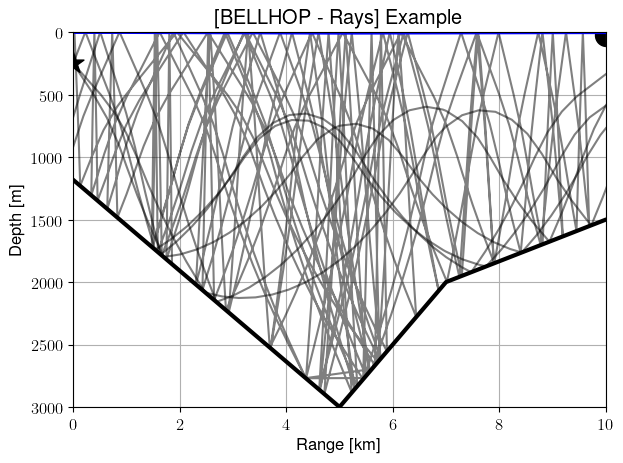

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[BELLHOP - Rays] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [15]:
BELLHOP.compute_rays()
BELLHOP.plot_rays(number=8)   

## Compute eigen rays

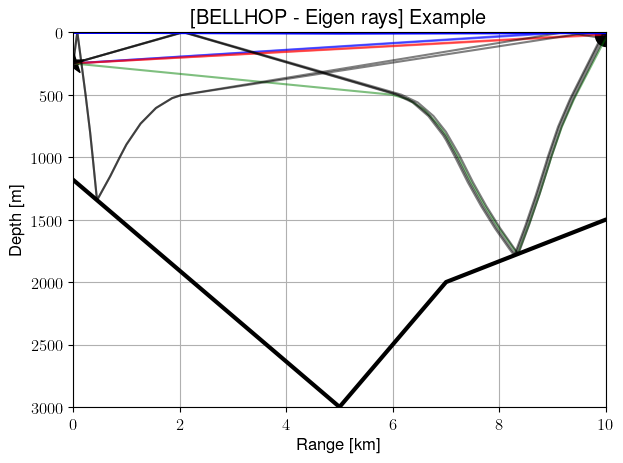

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[BELLHOP - Eigen rays] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [16]:
BELLHOP.compute_eigen_rays()
BELLHOP.plot_eigen_rays()   

## Source beam pattern

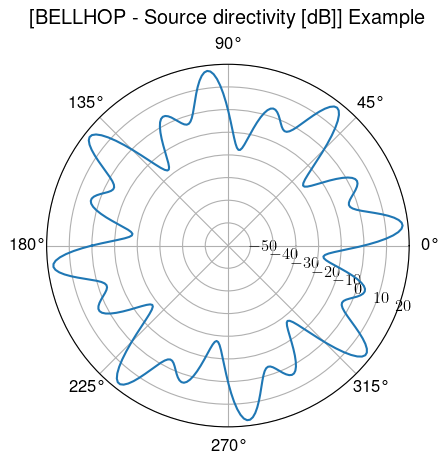

(<Figure size 640x480 with 1 Axes>,
 <PolarAxes: title={'center': '[BELLHOP - Source directivity [dB]] Example'}>)

In [17]:
BELLHOP.plot_beam()